In [64]:
!pip install split-folders

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import tensorflow as tf
import cv2

from PIL import Image, ImageOps
import scipy.ndimage as ndi

from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt

from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

import splitfolders

In [66]:
os.listdir(r'C:\Users\Admin\Desktop\kidney(agu)')

['Cyst', 'Normal', 'Stone', 'Tumor']

In [67]:
path_main = r'C:\Users\Admin\Desktop\kidney(agu)'
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder)) 
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'First item\'s name: {list_of_elements[0]}\n')
    print('***************************')

Folder: Cyst

Number of elements: 1500

First item's name: aug_0_7208.jpeg

***************************
Folder: Normal

Number of elements: 1500

First item's name: aug_0_2343.jpeg

***************************
Folder: Stone

Number of elements: 1500

First item's name: aug_0_2553.jpeg

***************************
Folder: Tumor

Number of elements: 1500

First item's name: aug_0_1711.jpeg

***************************


In [68]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [69]:
path_normal = r'C:\Users\Admin\Desktop\kidney(agu)\Normal'
path_stone = r'C:\Users\Admin\Desktop\kidney(agu)\Stone'
path_cyst = r'C:\Users\Admin\Desktop\kidney(agu)\Cyst'
path_tumor = r'C:\Users\Admin\Desktop\kidney(agu)\Tumor'


In [70]:
splitfolders.ratio(
    r'C:\Users\Admin\Desktop\kidney(agu)',
   output=r"C:\Users\Admin\Desktop\vgg16(agu)",
   seed=7,
   ratio=(0.8,0.2)
)

Copying files: 6000 files [00:23, 253.22 files/s]


In [71]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [72]:
train_dataset = train_datagen.flow_from_directory(r'C:\Users\Admin\Desktop\vgg16(agu)\train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory(r'C:\Users\Admin\Desktop\vgg16(agu)\test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [73]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=train_dataset.image_shape), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
 
])

In [74]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [75]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 50)

Epoch 1/50
3/3 [==============================] - 49s 14s/step - loss: 1.4238 - accuracy: 0.2133 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 29s 9s/step - loss: 1.3855 - accuracy: 0.2333 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 29s 10s/step - loss: 1.3829 - accuracy: 0.2867 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 28s 9s/step - loss: 1.3772 - accuracy: 0.4133 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 26s 8s/step - loss: 1.3830 - accuracy: 0.2700 - precision: 0.4400 - recall: 0.0367   
Epoch 6/50
3/3 [==============================] - 27s 9s/step - loss: 1.3846 - accuracy: 0.2500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 30s 10s/step - loss: 1.3633 - accuracy: 0.2567 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/50
3/3 

In [76]:
model.save('my_model3.h5')

In [77]:
model = tf.keras.models.load_model('my_model3.h5')
vgg_preds = model.predict(test_dataset)

12/12 [==============================] - 25s 2s/step


In [78]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
    diseases_labels.append(key)

In [79]:
def evaluate(actual, vgg_preds):
    
    
    pre = []
    for i in vgg_preds:
        pre.append(np.argmax(i))

    accuracy = (pre == actual).sum() / actual.shape[0]
    print(f'Accuracy: {accuracy}')

    precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')

    fig, ax = plt.subplots(figsize=(5,5))
    conf_mat = confusion_matrix(actual, pre)
    sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
    plt.show()

Accuracy: 0.8425
Precision: 0.8417960067278358
Recall: 0.8425
F1_score: 0.838036373852814


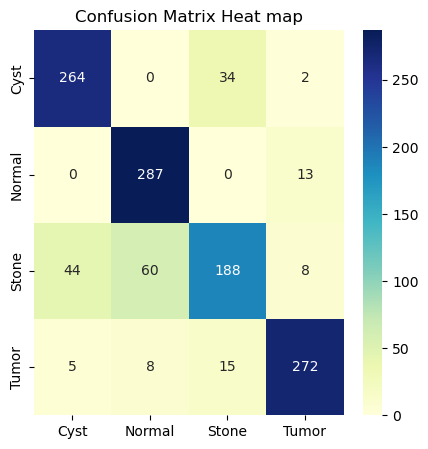

In [80]:
evaluate(test_dataset.classes,vgg_preds)